In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import warnings
warnings.filterwarnings("ignore")


dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)


%matplotlib inline

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


# Preamble

In [7]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'

y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [8]:
np.bincount(y_binary_imbalanced)

array([1615,  182])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

## Accuracy of Support Vector Machine classifier

In [11]:
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf', C = 1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9088888888888889

## Dummy Classifier

DummyClassifier is a classifier that makes predictions using simple rules, which can be useful as a baseline for comparison against actual classifiers, especially with imbalanced classes.

In [13]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

np.bincount(y_dummy_predictions) # everything is zero due to the majority vote

array([450])

In [14]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

Accuracy from dummy classifier is as high as the one from SVM. 

## SVM with linear kernel

In [15]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

# Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [17]:
# produces random predictions w/ same class proportion as training set
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[372  35]
 [ 38   5]]


In [19]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]


In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[401   6]
 [  6  37]]


In [21]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


Decision Tree didn't do well (generate lots of errors) compare to SVM and Logistic Regression.

# Precision, Recall, F1

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

   micro avg       0.95      0.95      0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



# Decision Functions

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[:20], y_scores_lr[:20]))

# show the decision_function scores for first 20 instances
y_score_list

[(0, -23.17711236290324),
 (0, -13.541470729541413),
 (0, -21.72290098969473),
 (0, -18.907438437430027),
 (0, -19.73582172900229),
 (0, -9.749807819560061),
 (1, 5.2349604859009276),
 (0, -19.307551661127864),
 (0, -25.101182889530396),
 (0, -21.82736239135058),
 (0, -24.151343401889438),
 (0, -19.576969790071697),
 (0, -22.574689400560423),
 (0, -10.823324268750714),
 (0, -11.912123406737392),
 (0, -10.97922371337485),
 (1, 11.206006114721543),
 (0, -27.64600231793191),
 (0, -12.859381428186682),
 (0, -25.848764845244997)]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

[(0, 8.59622935435435e-11),
 (0, 1.3152654562877047e-06),
 (0, 3.680136853269112e-10),
 (0, 6.146159365768372e-09),
 (0, 2.684364743208678e-09),
 (0, 5.8302468525539246e-05),
 (1, 0.9947011919630767),
 (0, 4.119427394145904e-09),
 (0, 1.2551475474865303e-11),
 (0, 3.3151024835512065e-10),
 (0, 3.244926244767743e-11),
 (0, 3.1465167386169614e-09),
 (0, 1.5701348842784633e-10),
 (0, 1.9928808739415592e-05),
 (0, 6.7085339693943354e-06),
 (0, 1.7052039108840334e-05),
 (1, 0.9999864078713285),
 (0, 9.851304579070747e-13),
 (0, 2.6015997081086803e-06),
 (0, 5.943250884839227e-12)]

# Precision-Recall curve

In [33]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

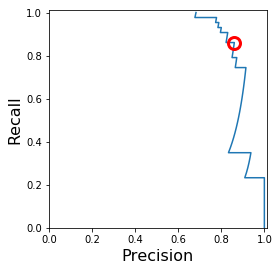

In [39]:
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

# ROC

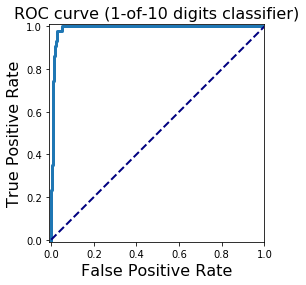

In [47]:
from sklearn.metrics import roc_curve, auc

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()